In [20]:
import matplotlib.pyplot as plt
plt.style.use('huntstone')
import numpy as np
from scipy.constants import c

from read_data import read_data
import v_x_interp as vx
import prop_plasma as pp
# Set parameters for reading WARGSim dumps
path   = "/media/keenan/Data_Storage/WARGSim/500dumps/"
N      = int(1e6)
nDumps = 500

In [5]:
beam_params = {
    'N'       : int(1e6),
    'beamE'   : 10e9, 
    'eps_n0'  : 3.0e-6,
    'beta0'   : [0.25, 0.25], 
    'alpha0'  : [0.00, 0.00],
    'rms_z'  : 0.00,
    'rms_gb0' : 0.01,
    'path'    : '/media/keenan/Data_Storage/WARGSim/',
    'B_mag'   : 5.00
}
plasma_params = {
    'n0'    : 0.34,
    'L_ft'  : 0.4,
    'hw_up' : 0.0,
    'shape' : 'Gauss'
}
my_ebeam = pp.init_beam(beam_params, plasma_params['n0'])
pwfa0    = pp.init_plasma(beam_params, plasma_params)

beta factor = 43.83
Bmag = 21.92
init eps_nx =  3.0026053988730285e-06
init eps_ny =  3.001398053243147e-06


In [6]:
dz     = pwfa0.dz[0]
z      = np.linspace(0, pwfa0.L, nDumps)
x      = np.zeros((nDumps))
gb     = np.zeros((nDumps))
t      = z / c;
t[0]   = 0;
for i in range(nDumps):
    if i%100 == 0 and i >=10:
        print(i)
    ptcls   = np.load(path + "_ptcls_" + str(i) + ".npy")
    x[i]  = ptcls[0,0]
    gb[i] = ptcls[0, 5] 

100
200
300
400


In [17]:
tau = t / gb
tau_int = np.linspace(tau[0], tau[-1], 1000)
x0n, x1n, x2n, x_int  = vx.position_interp(x, tau, tau_int)
z0n, z1n, z2n, z_int  = vx.position_interp(z, tau, tau_int)

In [26]:
# Assign angle of observation, and light frequency (800nm)
w     = 3.74740572e14
A     = w/c
theta = np.pi / 4
kappa = np.array([A, A * np.sin(theta), 0, A*np.cos(theta)])
x2j   = (z2n, x2n, x2n, z2n)

In [27]:
chi_2jn = kappa[0] * x2j[0] - kappa[1] * x2j[1] - kappa[2] * x2j[2] - kappa[3] * x2j[3]

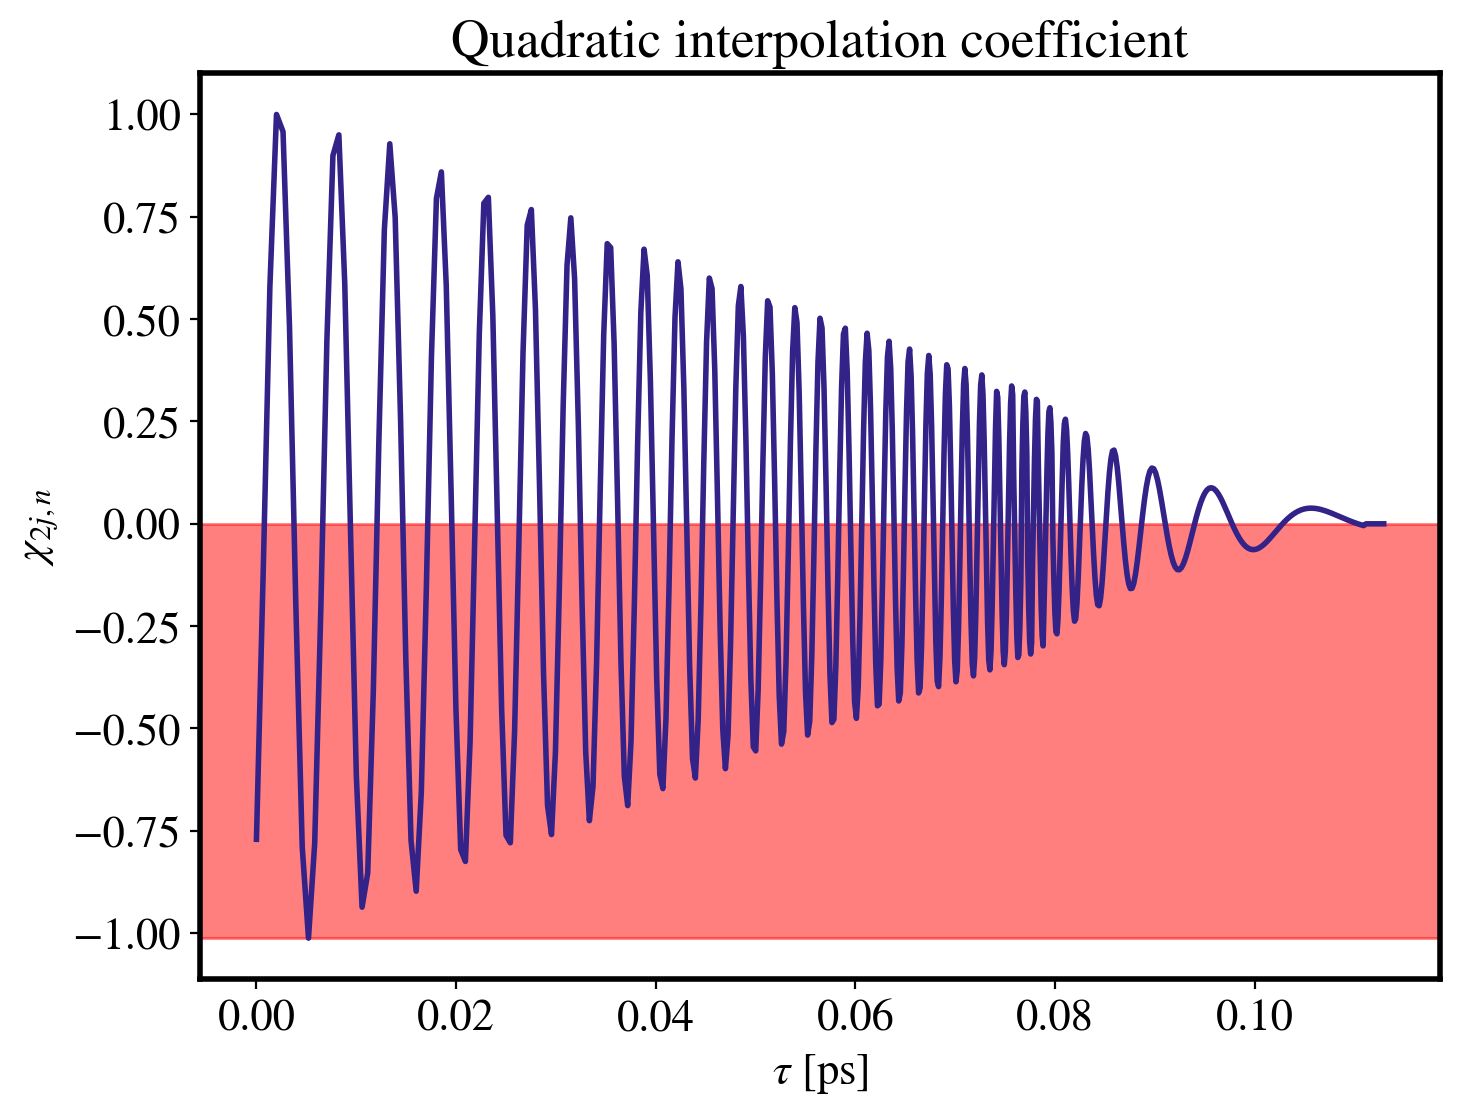

In [41]:
fig = plt.figure(figsize = (8,6), dpi = 200)
ax  = fig.gca()
ax.set_xlabel(r'$\tau$ [ps]')
ax.set_ylabel(r'$\chi_{2j,n}$')
ax.set_title('Quadratic interpolation coefficient')
ax.axhspan(min(chi_2jn / max(chi_2jn)), 0, color='red', alpha=0.5)
ax.plot(tau[0:-2]*1e12, chi_2jn / max(chi_2jn))
plt.show()